In [97]:
import numpy as np
from matplotlib import pyplot as plt

# Решение краевой задачи для линейного дифференциального уравнения второго порядка методом прогнки 

In [3]:
def p(x):
    return -(x - 1) * (x - 2)

In [4]:
def q(x):
    return np.cos(x)

In [5]:
def f(x):
    return np.cos(x) ** 2

In [51]:
def prog(p, q, f, a, b, c1, c2, c, d1, d2, d, n):
    h = (b - a) / n
    u = np.zeros(n + 1)
    v = np.zeros(n + 1)
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    alp = np.zeros(n + 1)
    bet = np.zeros(n + 1)
    gam = np.zeros(n + 1)
    phi = np.zeros(n + 1)
    
    x[0] = a
    i = 1
    u[0] = c * h / (c1 * h - c2)
    v[0] = -c2 / (c1 * h - c2)
    
    while True:
        x[i] = x[i - 1] + h
        alp[i] = 1 - p(x[i]) * h / 2
        bet[i] = h ** 2 * q(x[i]) - 2
        gam[i] = 1 + p(x[i]) * h / 2
        phi[i] = (h ** 2) * f(x[i])
        v[i] = -gam[i] / (bet[i] + alp[i] * v[i-1])
        u[i] = (phi[i] - alp[i] * u[i-1]) / (bet[i] + alp[i]*v[i])
        if i == n-1:
            break
        i += 1
    x[n] = b
    alp[n] = -d2
    bet[n] = h * d1 + d2
    phi[n] = h * d
    v[n] = 0
    u[n] = (phi[n] - alp[n] * u[n-1]) / bet[n]
    y[n] = u[n]
    i = n - 1
    while True:
        y[i] = u[i] + y[i+1]*v[i]
        if i == 0:
            break
        i -= 1
    return {'x': x, 'y': y}

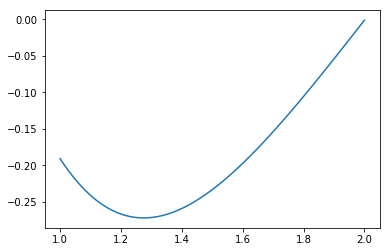

In [56]:
a = 1
b = 2
c1 = -1
c2 = 0.3
c = 0
d1 = 0.17
d2 = 0.19
d = 0
n = 500


ans = prog(p, q, f, a, b, c1, c2, c, d1, d2, d, n)
plt.plot(ans['x'], ans['y'])
plt.show()

# Решение нелинейной системы методом простых итераций 

In [69]:
def F(x):
    return np.array([np.sin(x[1] + 1) - 1.2, 1 - np.cos(x[0]) / 2])

In [80]:
def simple_iter(F, x0, eps=1e-6):
    k = 0
    while True:
        x = F(x0)
        if (np.linalg.norm(x - x0) < eps):
            return x0, k
        x0 = x
        k += 1

In [81]:
x0 = np.array([0, 0])
ans = simple_iter(F, x0)
ans[1]

6

In [82]:
x = ans[0]
[np.sin(x[1] + 1) - x[0] - 1.2, 2 * x[1] + np.cos(x[0]) - 2]

[6.434182142633915e-08, 1.305532745909943e-06]

# Решение слау методом главных компонент

In [137]:
A = np.array([[0.62, -0.44, -0.86],[0.83, 0.42, -0.56],[0.58, -0.37, -0.62]])
b = np.array([0.68, 1.24, 0.87])

In [138]:
def glavn(a, b):
    n = a.shape[0]
    for _ in range(1):
        # вычисляем главгный элемент и строку 
        print('------')
        print(a)
        max_index = np.unravel_index(np.argmax(np.absolute(a), axis=None), a.shape)
        print(max_index)
        a[[0, max_index[0]]] = a[[max_index[0], 0]]
        print('------')
        print(a)
        # вычисляем множители 
        
        # вычитаем 
        
        # пере

In [139]:
ans = glavn(A.copy(), b.copy())

------
[[ 0.62 -0.44 -0.86]
 [ 0.83  0.42 -0.56]
 [ 0.58 -0.37 -0.62]]
(0, 2)
------
[[ 0.62 -0.44 -0.86]
 [ 0.83  0.42 -0.56]
 [ 0.58 -0.37 -0.62]]


In [121]:
ans

array([[-0.1819103 , -0.2286747 , -0.56      ],
       [-0.75373494, -0.44168675, -0.86      ],
       [ 0.58      , -0.37      , -0.62      ]])